In [43]:
import gymnasium as gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display, Image    
import time
import pickle as pkl
from tabulate import tabulate
from tqdm import tqdm

**What is the Reinforcement Learning?**
RL is a powerful model within ML, focused on  how computational agents can learn to make decisions through interaction in environment by doing actions and receiving rewards.<br>
The  agent learns policy that maximizes that cumulative reward it can gather over time. In a typical RL loop, the agent observes the current state of the environment,<br> takes an action, and in return the environment provides a reward and transitions to a new state. This cycle repeats, and through trial and error the agent improves its policy<br>

### Core Concepts:

<b>Agent</b>: the Agent is the central in RL,  it is the learner and the decision maker. The agent selects an action based on its learned knowledge or exploration strategy. <br>
The main goal of the agent is to learn a policy (a strategy for choosing actions) that maximizes the total reward it accumulates over time.<br>
In FrozenLake, the agent move on the lake but it is controlled my algorithms.<br>

<b>Environment</b> That is a world for agent where the agent takes action, The env provides states. In FrozenLake the env is frozen lake including: slippery ice, holes and tressure.<br>

<b>State:</b> is like a point in the environment at a specific moment. The state tells you everything you need to know right now to decide your next move. At each moment the agent gets a new state (St).<br>
The agent doesn’t need to remember all past actions or rewards, the current state should already include everything important to predict what happens next.
In FrozenLake, a state can be  agent’s current tile on the grid.<br> There are 16 discrete states (for a 4×4 grid), typically numbered 0 to 15​. For example, state 0 to the start tile, and state 15 to the goal tile.

<b>Action</b>: is choice of the agent that can change the state, actions are the means by which the agent influences the environment. Agents have a list of possible actions defined by the env.<br> In FrozenLake, there are 4 discrete actions: move Left (0), Down (1), Right (2), or Up (3)​. The agent will choose one of these moves each step

<b>Reward</b>: is a feedback from the environment, that shows the immediate value of a state or state action transition. Rewards can be positive negative
<br>In FrozenLake, the agent gets a reward of +1.

<b>Policy(π)</b>:is  strategy that the agent follows to choose actions based on states, for a given state s, the policy outputs a single action a=π(s).The policy is essentially the agent’s behavior. For example,<br> a policy in FrozenLake can be a simple lookup that tells the agent in state 5, move right,  in state 6, move down for each state. A good policy maximizes the agent’s chance to get the goal,<br>

**Value Function**: it estimates how good it is to take a certain action in a state. Value functions are crucial for evaluating the goodness or badness of states or actions.<br>
It is s all about predicting future rewards. There are two main types:<br>
**State Value Function (V(s))**: if I am in this state, how many rewards can I expect to collect from here if I follow my current policy?, V(s) = Value of a state (where you are). <br>
**Action Value Function (Q(s,a))**: if I take this action  in this state, how many rewards will I get afterward?. Q(s,a) = Value of an action in a state (what you do). 

### The Exploration vs. Exploitation

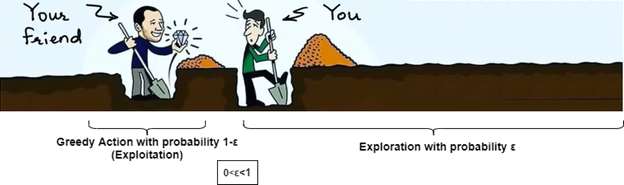

**Exploitation**: Use your current knowledge (Q-table) to pick the best known action for maximum reward.<br>
**Exploration**: tries new or random actions to discover better rewards. Example: The agent  tries a longer path that might have hidden shortcuts.<br>
If you only exploit , you miss better rewards (never finding a faster path) and if you only explore , you waste time on bad actions.<br>
**Greedy Strategy**: with probability 1–ε , exploit which means choose the best known action. With probability ε , explore which means try a random action.
start with high ε for example 1.0 = 100% exploration and slowly reduce it over time.<br> This lets the agent learn first, then optimize.<br>
RL agents need to learn (explore) and act smartly (exploit) at the same time. Strategies like epsilon greedy help them avoid getting stuck in good enough solutions. 




### Markov Decision Processes (MDP)
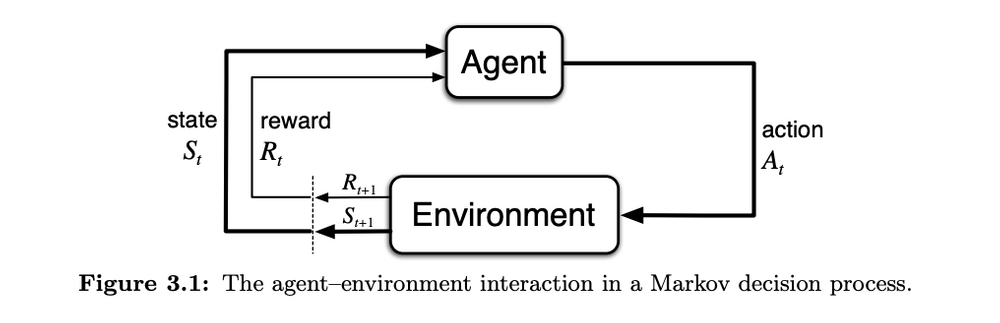<br>
MDP lets agents learn optimal policies  by balancing immediate rewards and future gains. Agents use MDP to learn policies that maximize long term rewards.<br>
**MDP is defined by (S, A, P, R, γ)**:<br>
I explained the S which is state, and A which is action already.<br>
**Transition Probabilities (P)**: the chance of moving to a new state s′ when taking action a in state s. For example: if you choose to move right there is a 70% chance is not hell  and a 30% chance you fall into it.<br>
**Reward Function (R)**: gaining reward or loss it for taking an action. For example +10 for finding treasure, -5 for falling into hell.<br>
**Discount Factor (γ)**: a value (0 ≤ γ ≤ 1) that prioritizes immediate rewards vs future rewards. Example: If γ=0.9, a future reward is worth 90% of a now reward.<br>
The next state and reward depend only on the current state and action, not on past.<br>
**Types of tasks in RL**:<br>
**Episodic Tasks**: have a clear end,  winning/losing a game, finishing a level.<br>
**Continuing Tasks**: never truly end, controlling a robot.


#### Q Learning
It teaches the agents to find the best action in every state to maximize long term rewards. A Q table stores a Q-value for every state action pair. Higher scores = better actions.<br>
**How It Works**: when the agent takes an action a in state s, gets reward r, and moves to state s', it updates the Q-value for (s, a)<br>
**New Q value = Old Q value + Learning Rate × (Reward + Discount × Best Q value - Old Q value)**<br>
Old Q value is the current guess for how good action a is in state s. Learning Rate (α) How quickly the agent trusts new experiences over old ones. α=0.1 means update slowly. (r) is reward of taking action a.
Best Future Q value is the highest Q value in the next state s', the best possible move from there.

**Sources:**<br>
https://www.geeksforgeeks.org/what-is-markov-decision-process-mdp-and-its-relevance-to-reinforcement-learning/<br>
https://www.analyticsvidhya.com/blog/2021/04/q-learning-algorithm-with-step-by-step-implementation-using-python/<br>
https://ai.stackexchange.com/questions/23676/what-is-the-meaning-of-exploration-in-reinforcement-and-supervised-learning<br>
https://ai-ml-analytics.com/reinforcement-learning-exploration-vs-exploitation-tradeoff/<br>
https://blog.mlq.ai/reinforcement-learning-action-value-function/<br>
https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-q-learning

#### FrozenLake with Q Learning

Each cell in the FrozenLake can be one of four types :<br>
S: Start.<br>
F: Frozen tile, safe to walk on.<br>
H: Hole tile, falling in ends the episode.<br>
G: Goal tile, reaching this tile successfully ends the episode.<br>

**Rewards**: +1 reaching the goal. 0 falling into H. You can add small negative rewards per step to encourage faster solutions. 


In [44]:
# Initializing environment
env = gym.make('FrozenLake-v1',is_slippery=False, render_mode='rgb_array')
grid_height, grid_width = env.unwrapped.desc.shape  
state, info = env.reset()
# reset the environment: Call reset() at the beginning of each new episode. It returns the initial state. additional info
# state, info = env.reset()

In [45]:
# Select a random action
random_action = env.action_space.sample()
print('Taking random action:', random_action)

# the action in the environment
new_state, reward, terminated, truncated, info = env.step(random_action)
print('New state:', new_state)
print('Reward received:', reward)
print('Goal or hole reached:',terminated) 
print('If time limit reached:',truncated)  
print('Transition probabilities:', info) 

Taking random action: 2
New state: 1
Reward received: 0.0
Goal or hole reached: False
If time limit reached: False
Transition probabilities: {'prob': 1.0}


In [46]:
# env.render(): It visualizes the current state
# env.close(): It closes the environment 

The agent only gets reward when it reaches the goal. All other steps like: walking on ice F or falling into holes H, reward is zero.<br>
In FrozenLake, the agent tries moving right randomly, fall into a hole, and get 0 reward. The Q value for that action drops.Q-values rise. Over time, the Q table finds to the safest way.<br>
**In slippery env**: if the agent tries to move right , it can slip up/down/right with 1/3 chance each.<br>
What I learned from FrozenLake, the Q table is the agent's memory, no fancy neural nets.



**Sources**:<br>
https://gsverhoeven.github.io/post/frozenlake-qlearning-convergence/<br>
https://analyticsindiamag.com/deep-tech/openai-gym-frozen-lake-beginners-guide-reinforcement-learning/
